In [19]:
from typing import Optional
import argparse
import os
import sys

import torch
import matplotlib.pyplot as plt     # type: ignore

import utilities
import model
import optimize
import pandas as pd

from utils import default_paths

import numpy as np

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

info_fn = os.path.join(default_paths.stim_root, 'Indep_set_info.csv')
print('\nloading image info from %s\n'%info_fn)
info_df = pd.read_csv(info_fn, index_col=0)


cuda

loading image info from /user_data/mmhender/nsd/stimuli/Indep_set_info.csv



In [21]:
fn_info = os.path.join(os.getcwd(),'vgg19_rfs_info.npy')
rfs_info = np.load(fn_info, allow_pickle=True).item()    

In [22]:
rfs_info.keys()

dict_keys(['pixel_centers', 'layer_unit_centers', 'layer_names_use', 'layer_inds'])

In [23]:
pixel_centers = rfs_info['pixel_centers']
layer_unit_centers = rfs_info['layer_unit_centers']
layer_names = rfs_info['layer_names_use']
layer_inds = rfs_info['layer_inds']
n_layers = len(layer_names)
n_pix = np.max(pixel_centers)+1

In [24]:
np.max(layer_unit_centers[1])

127

In [25]:
rfs_each_layer = []
for ll, layer in enumerate(['Conv1','MaxPool1','MaxPool2','MaxPool3','MaxPool4']):
    fn_rfs = os.path.join(os.getcwd(),'vgg19_unit_rfs_%s.npy'%layer)
    rfs = np.load(fn_rfs)
    rfs_each_layer.append(rfs)
    

In [26]:
sums = [np.sum(rfs, axis=0) for rfs in rfs_each_layer]

In [27]:
uniq = [np.unique(s, return_counts=True) for s in sums]
counts = [uu[1] for uu in uniq]
unvals = [uu[0] for uu in uniq]

In [10]:
unvals

[array([4, 6, 9]),
 array([16, 24, 36]),
 array([100, 140, 160, 196, 224, 256]),
 array([ 900, 1140, 1380, 1444, 1560, 1748, 1976, 2116, 2392, 2704]),
 array([ 4900,  6020,  7140,  7396,  8260,  8680,  8772, 10148, 10404,
        10664, 12036, 12648, 13924, 14632, 15376])]

In [11]:
counts

[array([    4,  1016, 64516]),
 array([    4,   504, 15876]),
 array([   4,    8,  240,    4,  240, 3600]),
 array([  4,   8,   8,   4, 104,   8, 104,   4, 104, 676]),
 array([ 4,  8,  8,  4,  8, 32,  8,  8,  4, 32,  8, 32,  4, 32, 64])]

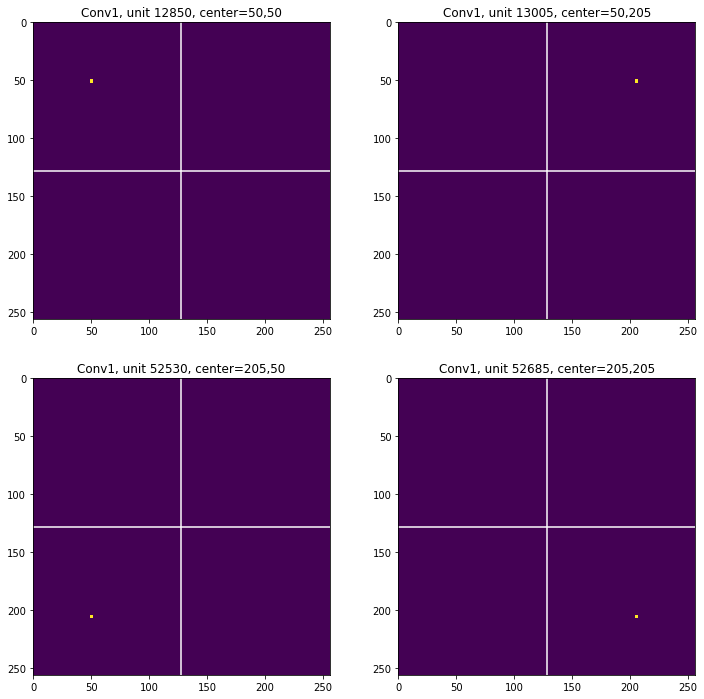

In [31]:
import copy

plt.figure(figsize=(12,12))

ll = 0;

unit_centers_plot = np.array([[50,50],
                              [50,205],
                              [205,50],
                              [205,205]
                             ])
units_plot = [np.where([cent==tuple(unit_centers_plot[cc]) for cent in layer_unit_centers[ll]])[0][0] 
                for cc in range(len(unit_centers_plot))]
pi=0
for unit in units_plot:
    
    center = layer_unit_centers[ll][unit]

    pi+=1
    plt.subplot(2,2,pi)
    rf = copy.deepcopy(rfs_each_layer[ll][:,unit])
    rf = np.reshape(rf, [n_pix, n_pix])
    # print(np.sum(rf))
    plt.pcolormesh(rf)
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axhline(n_pix/2, color='w')
    plt.axvline(n_pix/2, color='w')
   
    plt.title('%s, unit %d, center=%d,%d'%(layer_names[ll], unit, \
                                           center[0], center[1]))

In [30]:
pixel_centers[2000]

(7, 208)

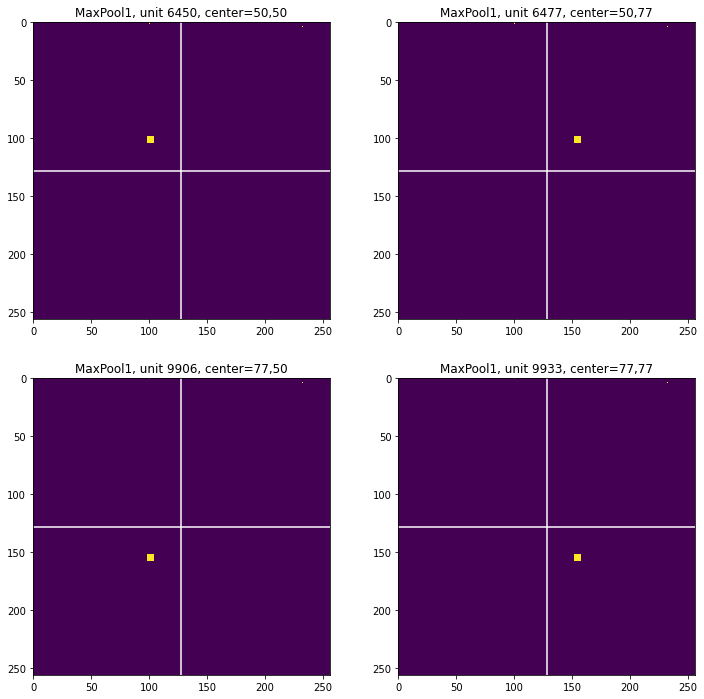

In [18]:
plt.figure(figsize=(12,12))

ll = 1;

unit_centers_plot = np.array([[50,50],
                              [50,77],
                              [77,50],
                              [77,77]
                             ])
units_plot = [np.where([cent==tuple(unit_centers_plot[cc]) for cent in layer_unit_centers[ll]])[0][0] 
                for cc in range(len(unit_centers_plot))]
pi=0
for unit in units_plot:
    
    center = layer_unit_centers[ll][unit]

    pi+=1
    plt.subplot(2,2,pi)
    rf = rfs_each_layer[ll][:,unit]
    rf = np.reshape(rf, [n_pix, n_pix])
    # print(np.sum(rf))
    plt.pcolormesh(rf)
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axhline(n_pix/2, color='w')
    plt.axvline(n_pix/2, color='w')
   
    plt.title('%s, unit %d, center=%d,%d'%(layer_names[ll], unit, \
                                           center[0], center[1]))

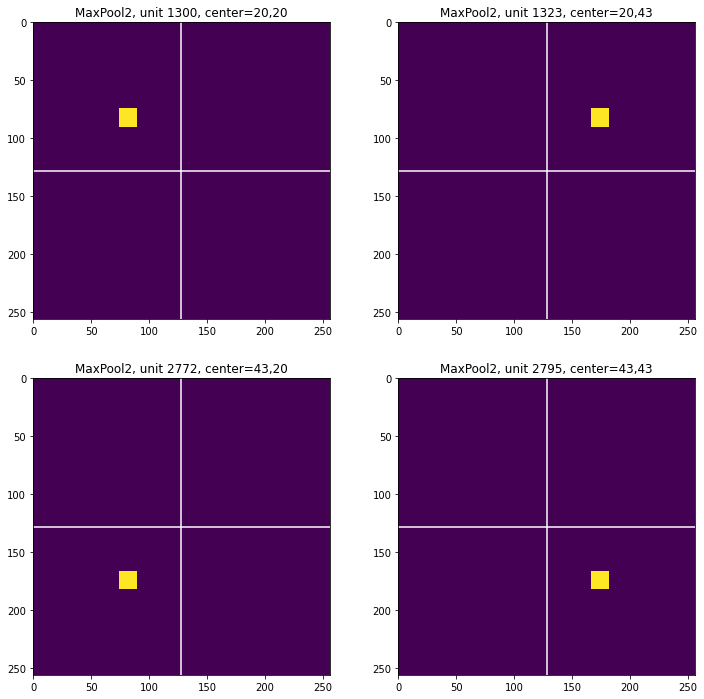

In [14]:
plt.figure(figsize=(12,12))

ll = 2;

unit_centers_plot = np.array([[20,20],
                              [20,43],
                              [43,20],
                              [43,43]
                             ])
units_plot = [np.where([cent==tuple(unit_centers_plot[cc]) for cent in layer_unit_centers[ll]])[0][0] 
                for cc in range(len(unit_centers_plot))]
pi=0
for unit in units_plot:
    
    center = layer_unit_centers[ll][unit]

    pi+=1
    plt.subplot(2,2,pi)
    rf = rfs_each_layer[ll][:,unit]
    rf = np.reshape(rf, [n_pix, n_pix])
    # print(np.sum(rf))
    plt.pcolormesh(rf)
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axhline(n_pix/2, color='w')
    plt.axvline(n_pix/2, color='w')
   
    plt.title('%s, unit %d, center=%d,%d'%(layer_names[ll], unit, \
                                           center[0], center[1]))

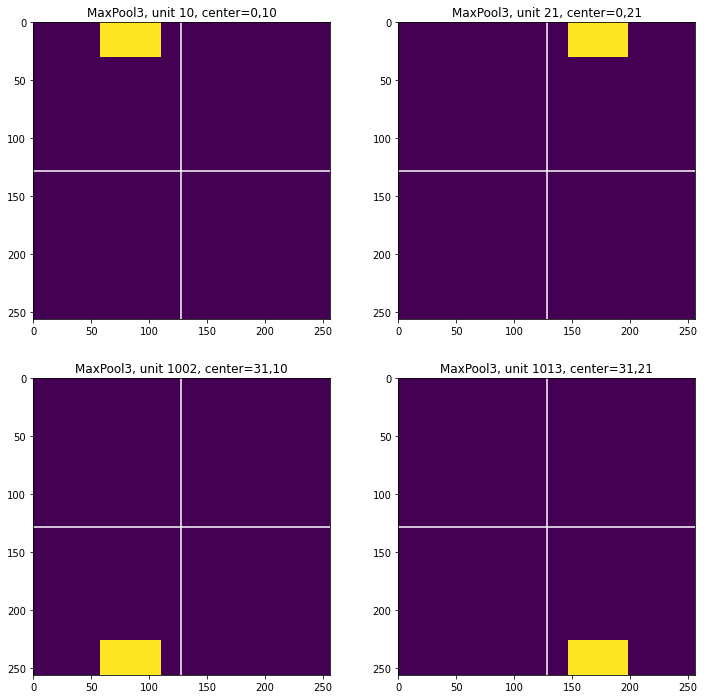

In [15]:
plt.figure(figsize=(12,12))

ll = 3;

# unit_centers_plot = np.array([[10,10],
#                               [10,21],
#                               [21,10],
#                               [21,21]
#                              ])
unit_centers_plot = np.array([[0,10],
                              [0,21],
                              [31,10],
                              [31,21]])

units_plot = [np.where([cent==tuple(unit_centers_plot[cc]) for cent in layer_unit_centers[ll]])[0][0] 
                for cc in range(len(unit_centers_plot))]
pi=0
for unit in units_plot:
    
    center = layer_unit_centers[ll][unit]

    pi+=1
    plt.subplot(2,2,pi)
    rf = rfs_each_layer[ll][:,unit]
    rf = np.reshape(rf, [n_pix, n_pix])
    # print(np.sum(rf))
    plt.pcolormesh(rf)
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axhline(n_pix/2, color='w')
    plt.axvline(n_pix/2, color='w')
   
    plt.title('%s, unit %d, center=%d,%d'%(layer_names[ll], unit, \
                                           center[0], center[1]))

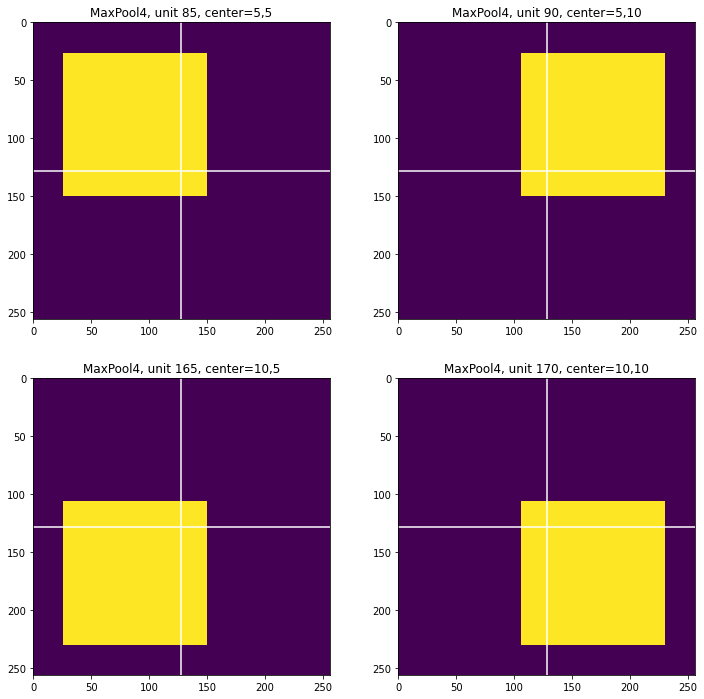

In [16]:
plt.figure(figsize=(12,12))

ll = 4;

# unit_centers_plot = np.array([[2,2],
#                               [2,13],
#                               [13,2],
#                               [13,13]
#                              ])
unit_centers_plot = np.array([[5,5],
                              [5,10],
                              [10,5],
                              [10,10]
                             ])
units_plot = [np.where([cent==tuple(unit_centers_plot[cc]) for cent in layer_unit_centers[ll]])[0][0] 
                for cc in range(len(unit_centers_plot))]
pi=0
for unit in units_plot:
    
    center = layer_unit_centers[ll][unit]

    pi+=1
    plt.subplot(2,2,pi)
    rf = rfs_each_layer[ll][:,unit]
    rf = np.reshape(rf, [n_pix, n_pix])
    plt.pcolormesh(rf)
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axhline(n_pix/2, color='w')
    plt.axvline(n_pix/2, color='w')
    # plt.colorbar()
    plt.title('%s, unit %d, center=%d,%d'%(layer_names[ll], unit, \
                                           center[0], center[1]))